In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import missingno as miss_no

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, learning_curve, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, precision_score, recall_score, f1_score, log_loss
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

## Import Data Set

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Cleaning

### Feature 1 (Time) is irrevalant to determing if data is fraud

In [5]:
df = df.drop("Time", axis=1)

In [6]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploration of Data

In [7]:
# Initial exploration of raw data

para = df.shape
print("Number of responses =",para[0],"\n" + "Number of features =",para[1])

Number of responses = 284807 
Number of features = 30


#### Visualizing missing data using sns.heatmap


Text(0.5, 1.0, 'Missing data visualization')

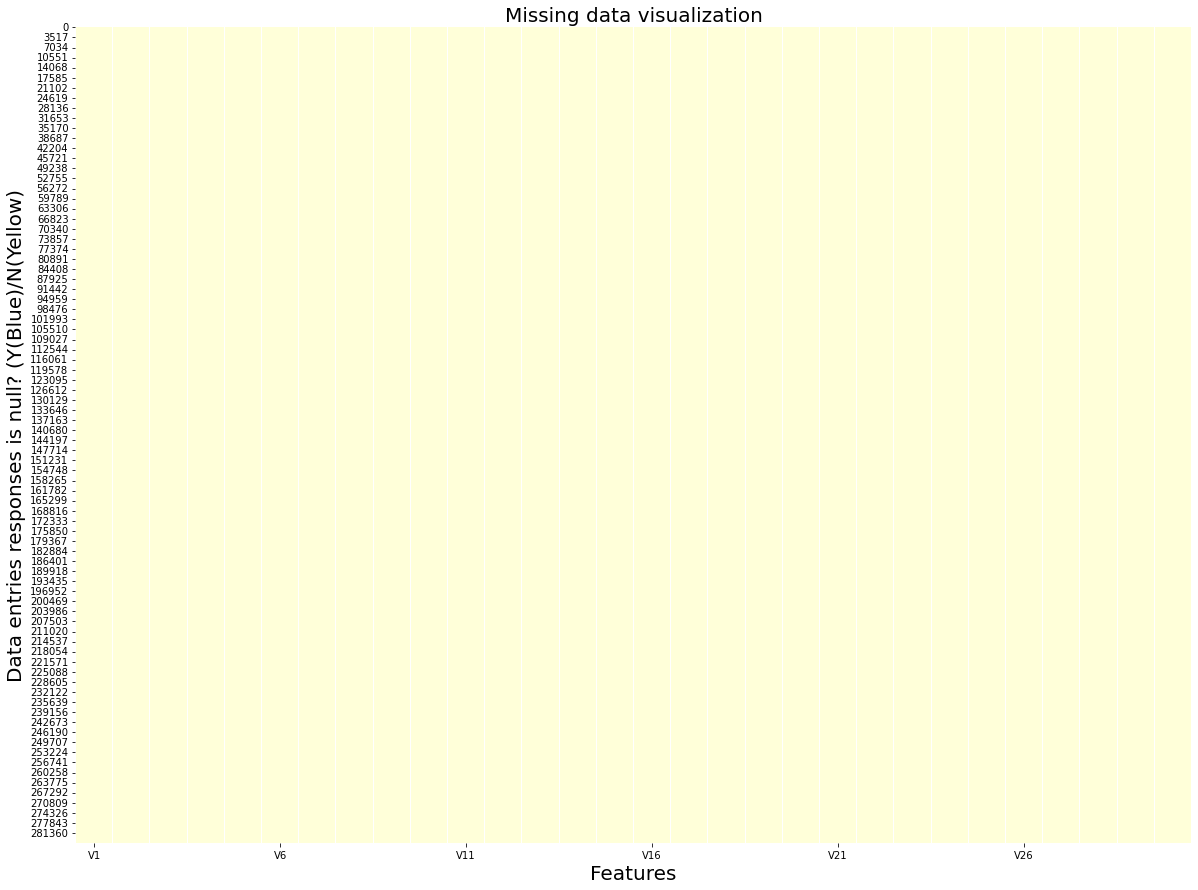

In [8]:
fig, ax = plt.subplots(figsize=(20,15))

sns.heatmap(df.isnull(), cmap="YlGnBu", xticklabels = 5,  cbar=False)

ax.set_xlabel('Features', Fontsize = 20)
ax.set_ylabel('Data entries responses is null? (Y(Blue)/N(Yellow)', Fontsize = 20)
ax.set_title('Missing data visualization', Fontsize = 20)

Since there are no blue colors, there are no null values.

Text(0.5, 1.0, 'Missing data visualization')

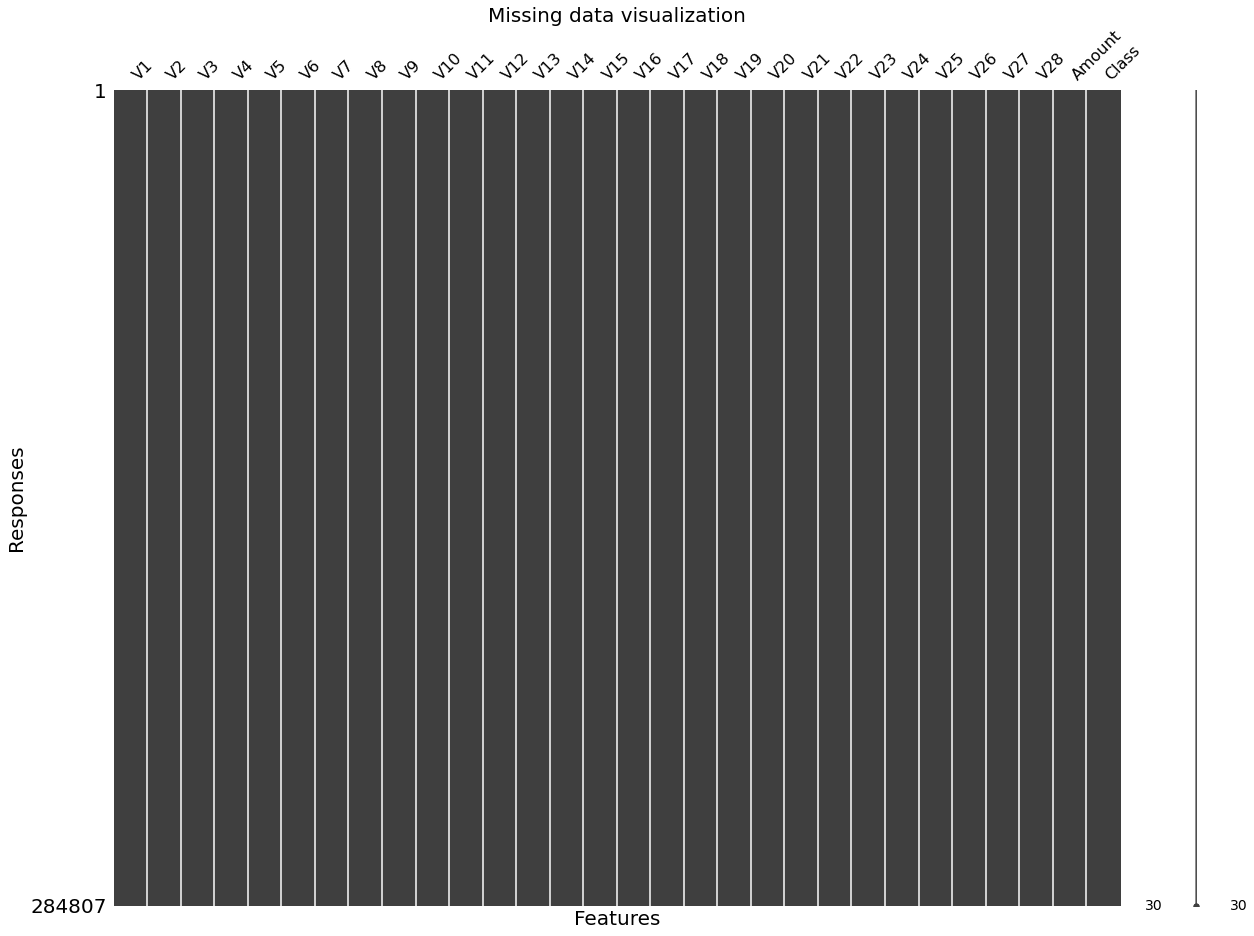

In [9]:
ax = miss_no.matrix(df,figsize=(20,15))

ax.set_xlabel('Features', Fontsize = 20)
ax.set_ylabel('Responses', Fontsize = 20)
ax.set_title('Missing data visualization', Fontsize = 20)

Since there are no broken lines, there are no null values.



In [10]:
# checking missing values in each feature

missing_value_count = df.isna().sum().sort_values(ascending=False)
print(missing_value_count)

V1        0
V2        0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V16       0
V15       0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
Class     0
dtype: int64


From this, we can see that no other data cleaning is required.

### Understanding Class


In [11]:
print('Unique values in class column:')
for i in df['Class'].unique():
  print(i)

Unique values in class column:
0
1


## Correlation

In [12]:
# Segregating Features and Target Variables in two different data sets 

other_text_list = [col for col in df.columns if 'Class' in col]
X = df.drop(other_text_list, axis = 1)
Y = df[other_text_list[0]]

Number of Features Picked by the Correlation Matrix :  12


Text(159.0, 0.5, 'Potential Features')

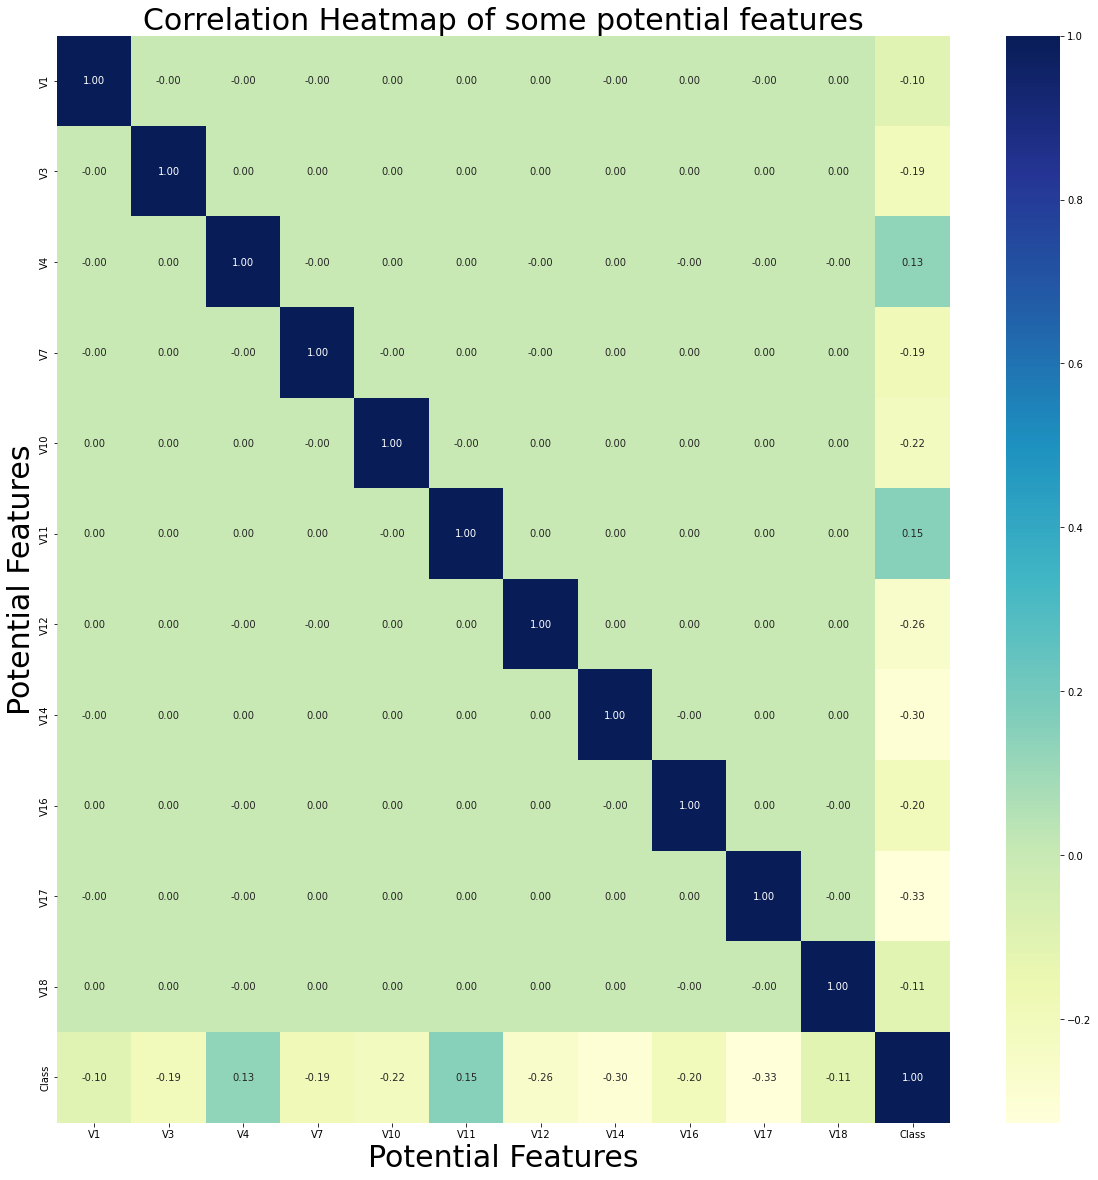

In [13]:
# Creating a Data set for Correlation Plot
clean_data2 = df

# Getiing correlations Between features
corr_mat = clean_data2.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(20,20))

# Correlation with output variable
corr_target = abs(corr_mat['Class'])

# Selecting features which are highly correlated to the target variable
relevant_features = corr_target[corr_target > 0.10]
print('Number of Features Picked by the Correlation Matrix : ', len(relevant_features))

# Ploting heat map
g=sns.heatmap(clean_data2[pd.Series(relevant_features.index.values)].corr(),annot=True,fmt='.2f', cmap="YlGnBu")
g.set_title("Correlation Heatmap of some potential features", fontsize=30)
g.set_xlabel("Potential Features",fontsize=30)
g.set_ylabel("Potential Features",fontsize=30)

In [14]:
print(relevant_features.index)

# Creating a data set for the selected features
work_data = clean_data2[pd.Series(relevant_features.index.values)].corr()
work_data.head()

Index(['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18',
       'Class'],
      dtype='object')


,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Class
V1,1.000000e+00,-1.227819e-15,-9.215150e-16,-1.005191e-15,7.388135e-17,2.125498e-16,2.053457e-16,-5.020280e-16,7.212815e-17,-3.879840e-16,3.230206e-17,-0.101347
V3,-1.227819e-15,1.000000e+00,4.711293e-16,4.895305e-16,1.156587e-15,1.576830e-15,6.310231e-16,4.739859e-16,8.299445e-16,7.614712e-16,1.509897e-16,-0.192961
V4,-9.215150e-16,4.711293e-16,1.000000e+00,-4.104503e-16,2.232685e-16,3.459380e-16,-5.625518e-16,2.282280e-16,-9.614528e-16,-2.699612e-16,-5.103644e-16,0.133447
V7,-1.005191e-15,4.895305e-16,-4.104503e-16,1.000000e+00,-7.492834e-17,1.425248e-16,-3.536655e-18,2.607772e-16,5.869302e-17,2.177192e-16,7.604126e-17,-0.187257
V10,7.388135e-17,1.156587e-15,2.232685e-16,-7.492834e-17,1.000000e+00,-4.622103e-16,1.771869e-15,2.635936e-16,3.545450e-16,1.542955e-15,3.902423e-16,-0.216883


In [15]:
# Removing features which are highly correlated to each other

redundant_cols = []
for i in range(0,len(relevant_features)):
    df2 = pd.DataFrame(work_data.iloc[i,:])<0.7
    df2.iloc[i,0] = True
    rows = list((df[(df.iloc[:,0] == False)].index).values)
    if len(rows) > 0:
        redundant_cols += rows
print("The following features are highly correlated to each other: \n" + str(redundant_cols) + "\n")

The following features are highly correlated to each other: 
[]



In [16]:
relevant_features.drop(redundant_cols[1:],axis=0,inplace=True)
print('Number of Relevant Features left after delecting the highly correlated features : ', len(relevant_features))

Number of Relevant Features left after delecting the highly correlated features :  12


In [17]:
randomforestselect = SelectFromModel(RandomForestClassifier(n_estimators = 100))
randomforestselect.fit(X, Y)

SelectFromModel(estimator=RandomForestClassifier())

In [18]:
randomf_selected_feat = X.columns[(randomforestselect.get_support())]
print('The number of selected features by random forest : ', len(randomf_selected_feat), "\n")
print("The selected fetures are as follows :" , "\n\n" , randomf_selected_feat)

The number of selected features by random forest :  8 

The selected fetures are as follows : 

 Index(['V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'], dtype='object')


In [19]:
col_feat = X.columns

# Initializing the Lasso variable and fitting it with feature and target variable.
model_lasso = Lasso(alpha = 0.01, random_state=5).fit(X,Y)

# Using .coef_ attribute to give a correlation between the features
coef_b = pd.Series(model_lasso.coef_, index = X.columns)

# Deleting the features whose correlation value is 0
print("\nLasso picked " + str(sum(coef_b != 0)) + " variables and eliminated the other " +  str(sum(coef_b == 0)) + " variables\n")

# Initializing SelectFromModel to easily select the features from our Lasso Model
sfm_b = SelectFromModel(model_lasso)

# Training the selector
sfm_b.fit(X,Y)

# Printing the names of the most important features
print("The names of the selected important features are as follows : " + "\n")
for feature_list_index in sfm_b.get_support(indices=True):
    print(col_feat[feature_list_index])

# New feature data with selected features
feature_data_selected = X[X.columns[(sfm_b.get_support())]]


Lasso picked 4 variables and eliminated the other 25 variables

The names of the selected important features are as follows : 

V3
V12
V14
V17


In [20]:
# Converting the selected features to sets

corr_set=set(relevant_features)
print("The number of selected features by the \"Correlation Plot\" Technique : " + str(len(corr_set)))
rand_for_set=set(randomf_selected_feat)
print("The number of selected features by the \"Random Forest\" Technique : " + str(len(rand_for_set)))
lasso_set=set(feature_data_selected)
print("The number of selected features by the \"Lasso Regression\" Technique : " + str(len(lasso_set)))

The number of selected features by the "Correlation Plot" Technique : 12
The number of selected features by the "Random Forest" Technique : 8
The number of selected features by the "Lasso Regression" Technique : 4


In [21]:
print("Number of common selected features by the \"Correlation Plot\" Technique and the \"Random Forest\" Technique : " + str(len(rand_for_set.intersection(corr_set))))
print("Number of common selected features by the \"Correlation Plot\" Technique and the \"Lasso Regression\" Technique : " + str(len(lasso_set.intersection(corr_set))))
print("Number of common selected features by the \"Lasso Regression\" Technique and the \"Random Forest\" Technique : " + str(len(rand_for_set.intersection(lasso_set))))

Number of common selected features by the "Correlation Plot" Technique and the "Random Forest" Technique : 0
Number of common selected features by the "Correlation Plot" Technique and the "Lasso Regression" Technique : 0
Number of common selected features by the "Lasso Regression" Technique and the "Random Forest" Technique : 3


In [22]:
print(relevant_features)
print(df.columns)

V1       0.101347
V3       0.192961
V4       0.133447
V7       0.187257
V10      0.216883
V11      0.154876
V12      0.260593
V14      0.302544
V16      0.196539
V17      0.326481
V18      0.111485
Class    1.000000
Name: Class, dtype: float64
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [23]:
relevant_features = list(relevant_features.to_frame().index.values)
randomf_selected_feat = list(randomf_selected_feat.values)
feature_data_selected = list(feature_data_selected.columns)

# Creating the data sets
df_corr=df[relevant_features]
df_rand=df[randomf_selected_feat]
df_lasso=df[feature_data_selected]

# Convering to Excel Sheets
# df_corr.to_excel("df_corr.xlsx", sheet_name='Correlation Plot')
# df_rand.to_excel("df_rand.xlsx", sheet_name='Random Forest')
# df_lasso.to_excel("df_lasso.xlsx", sheet_name='Lasso Regression')

In [24]:
# Dimensionality Reduction for the selected features from the Correlation Plot

pca = PCA(n_components=0.99,random_state=0)
pca_fit_corr = pd.DataFrame(pca.fit_transform(df_corr))
print(pca_fit_corr.shape)

(284807, 11)


Cumunlative explained variance is =  99.9944946239565 %


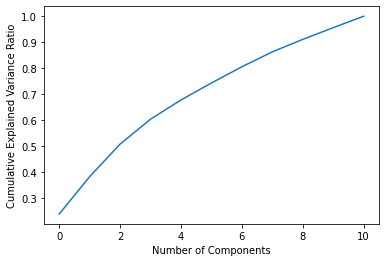

In [25]:
# plotting explained variance vs. number of components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

print('Cumunlative explained variance is = ', np.cumsum(pca.explained_variance_ratio_)[-1]*100, '%')

In [26]:
# Dimensionality Reduction for the selected features from the Random Forest

pca = PCA(n_components=0.99,random_state=0)
pca_fit_rand = pd.DataFrame(pca.fit_transform(df_rand))
print(pca_fit_rand.shape)

(284807, 8)


Cumunlative explained variance is =  100.0 %


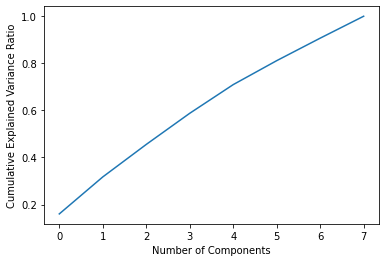

In [27]:
# plotting explained variance vs number of components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

print('Cumunlative explained variance is = ', np.cumsum(pca.explained_variance_ratio_)[-1]*100, '%')

In [28]:
# Dimensionality Reduction for the selected features from the Lasso Regression

pca = PCA(n_components=0.99,random_state=0)
pca_fit_lasso = pd.DataFrame(pca.fit_transform(df_lasso))
print(pca_fit_lasso.shape)

(284807, 4)


Cumunlative explained variance is =  100.0 %


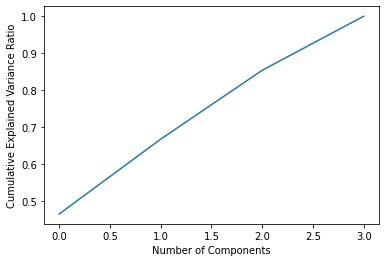

In [29]:
# plotting explained variance vs number of components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

print('Cumunlative explained variance is = ', np.cumsum(pca.explained_variance_ratio_)[-1]*100, '%')

### Training and Testing a Model:

Testing the fraud-detection model:

In [30]:
# Splitting the data into training and testing data - 30% testing and 70% training 
# Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify

X_train_corr, X_test_corr, Y_train_corr, Y_test_corr = train_test_split(pca_fit_corr,Y,test_size=0.3, random_state=101, stratify=Y)

In [31]:
# Model Implementation

model = LogisticRegression(multi_class='ovr', C=1.0, penalty='l2', solver='lbfgs')
model.fit(X_train_corr, Y_train_corr)
train_output = model.predict(X_train_corr)
train_accuracy = accuracy_score(Y_train_corr, train_output)
print("The train accuracy achieved : ",(train_accuracy))

The train accuracy achieved :  0.9991573202784856


In [32]:
test_output = model.predict(X_test_corr)
test_accuracy = accuracy_score(Y_test_corr, test_output)
print("The test accuracy achieved : ",(test_accuracy))

The test accuracy achieved :  0.9991807403766253


In [33]:
train_accuracy_list = []
test_accuracy_list = []
X = np.array(X_train_corr)
y = np.array(Y_train_corr)
kf = KFold(n_splits=10)
kf.get_n_splits(X)

num_fold=1
for train_index, test_index in kf.split(X):
     
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression(multi_class='ovr', C=1.0, penalty='l2', solver='lbfgs')
    model.fit(X_train, y_train)
    train_output = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_output)
    train_accuracy_list.append(train_accuracy)
    test_output = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_output)
    test_accuracy_list.append(test_accuracy)
    print("\nTrain accuracy achieved at fold {} : {}".format(num_fold, train_accuracy))
    print("Test accuracy achieved at fold {} : {}".format(num_fold, test_accuracy))
    
    num_fold+=1


Train accuracy achieved at fold 1 : 0.9991974452005551
Test accuracy achieved at fold 1 : 0.9987962080553744

Train accuracy achieved at fold 2 : 0.9991249923367164
Test accuracy achieved at fold 2 : 0.9992977880323017

Train accuracy achieved at fold 3 : 0.9991305656339347
Test accuracy achieved at fold 3 : 0.99944826202538

Train accuracy achieved at fold 4 : 0.9991918719033367
Test accuracy achieved at fold 4 : 0.9991974720369163

Train accuracy achieved at fold 5 : 0.9991417170118376
Test accuracy achieved at fold 5 : 0.9993479133226324

Train accuracy achieved at fold 6 : 0.9991528635441514
Test accuracy achieved at fold 6 : 0.9989967897271268

Train accuracy achieved at fold 7 : 0.9991082774148963
Test accuracy achieved at fold 7 : 0.9993980738362761

Train accuracy achieved at fold 8 : 0.9991417170118376
Test accuracy achieved at fold 8 : 0.9992475922953451

Train accuracy achieved at fold 9 : 0.9991640100764652
Test accuracy achieved at fold 9 : 0.9988964686998395

Train accur

In [34]:
# Calculating the average and the variance of the achieved accuracies

avg_train_accuracy = np.mean(np.array(train_accuracy_list))
avg_test_accuracy = np.mean(np.array(test_accuracy_list))
var_train_accuracy = np.var(np.array(train_accuracy_list))
var_test_accuracy = np.var(np.array(test_accuracy_list))

print("The Average Train Accuracy achieved is : ", avg_train_accuracy)
print("The Average Test Accuracy achieved is : ", avg_test_accuracy)
print("\nThe Variance of Train Accuracy achieved is : ", var_train_accuracy)
print("The Variance of Test Accuracy achieved is : ", var_test_accuracy)

The Average Train Accuracy achieved is :  0.9991584349404079
The Average Test Accuracy achieved is :  0.9991523036731034

The Variance of Train Accuracy achieved is :  1.2921445033801557e-09
The Variance of Test Accuracy achieved is :  5.0043499921555234e-08


# Test

In [35]:
# Function to compute confusion matrix
def conf_mat(y_test, y_pred):
    """
    Computes confusion matrix
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      confusion_mat (array): A 2D array representing a 2x2 confusion matrix
    """
    y_test, y_pred = list(y_test), list(y_pred)
    count, labels, confusion_mat = len(y_test), [0, 1], np.zeros(shape = (2, 2), dtype = int)
    for i in range(2):
        for j in range(2):
            confusion_mat[i][j] = len([k for k in range(count) if y_test[k] == labels[i] and y_pred[k] == labels[j]])
    return confusion_mat

In [36]:
confusion_mat = conf_mat(y_test, test_output)
tn, fp, fn, tp = confusion_mat[0, 0], confusion_mat[0, 1], confusion_mat[1, 0], confusion_mat[1, 1]

In [37]:
print(pd.Series({
        "Accuracy": (tp + tn) / (tn + fp + fn + tp),
        "Precision": tp / (tp + fp),
        "Recall": tp / (tp + fn),
        "F1-score": (2 * tp) / ((2 * tp) + fn + fp),
        "F2-score": (5 * tp) / ((5 * tp) + (4 * fn) + fp),
        "MCC": ((tp * tn) - (fp * fn)) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
  }).to_string())

Accuracy     0.998896
Precision    0.800000
Recall       0.600000
F1-score     0.685714
F2-score     0.631579
MCC          0.692298


In [38]:
print(tp)

24


In [39]:
print(tn)

19890


In [40]:
print(fp)

6


In [41]:
print(fn)

16
